**1η Εργαστηριακή Άσκηση στο μάθημα Ψηφιακή Επεξεργασία Σήματος 2024**

| Ονοματεπώνυμα | ΑΜ |
|----------------|----|
| Γεώργιος Αλέξανδρος Γεωργαντζάς        | 03120017 |
| Βλάσιος Σκουλής        | 03120065 |

**Μέρος 1ο - Σύστημα Εντοπισμού Τηλεφωνικών Τόνων (Telephone Touch – Tones)**

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write
import scipy as sp
import IPython
import soundfile as sf

In [123]:
import numpy as np
import IPython.display

samplerate = 8192
w_row = np.array([0.5346, 0.5906, 0.6535, 0.7217])
w_column = np.array([0.9273, 1.0247, 1.1328])

# Create radial frequency matrix
w = np.empty((10, 2))
for i in range(3):
    for j in range(3):
        w[i * 3 + j + 1] = [w_row[i], w_column[j]]

w[0] = [w_row[3], w_column[1]]

L = 1000
t = np.linspace(0, L-1, L)
d = np.zeros((L, 10))

# Generate signals
for j in range(10):
    d[:, j] = np.sin(w[j][0] * t) + np.sin(w[j][1] * t)
    IPython.display.display(IPython.display.Audio(d[:, j], rate=samplerate))

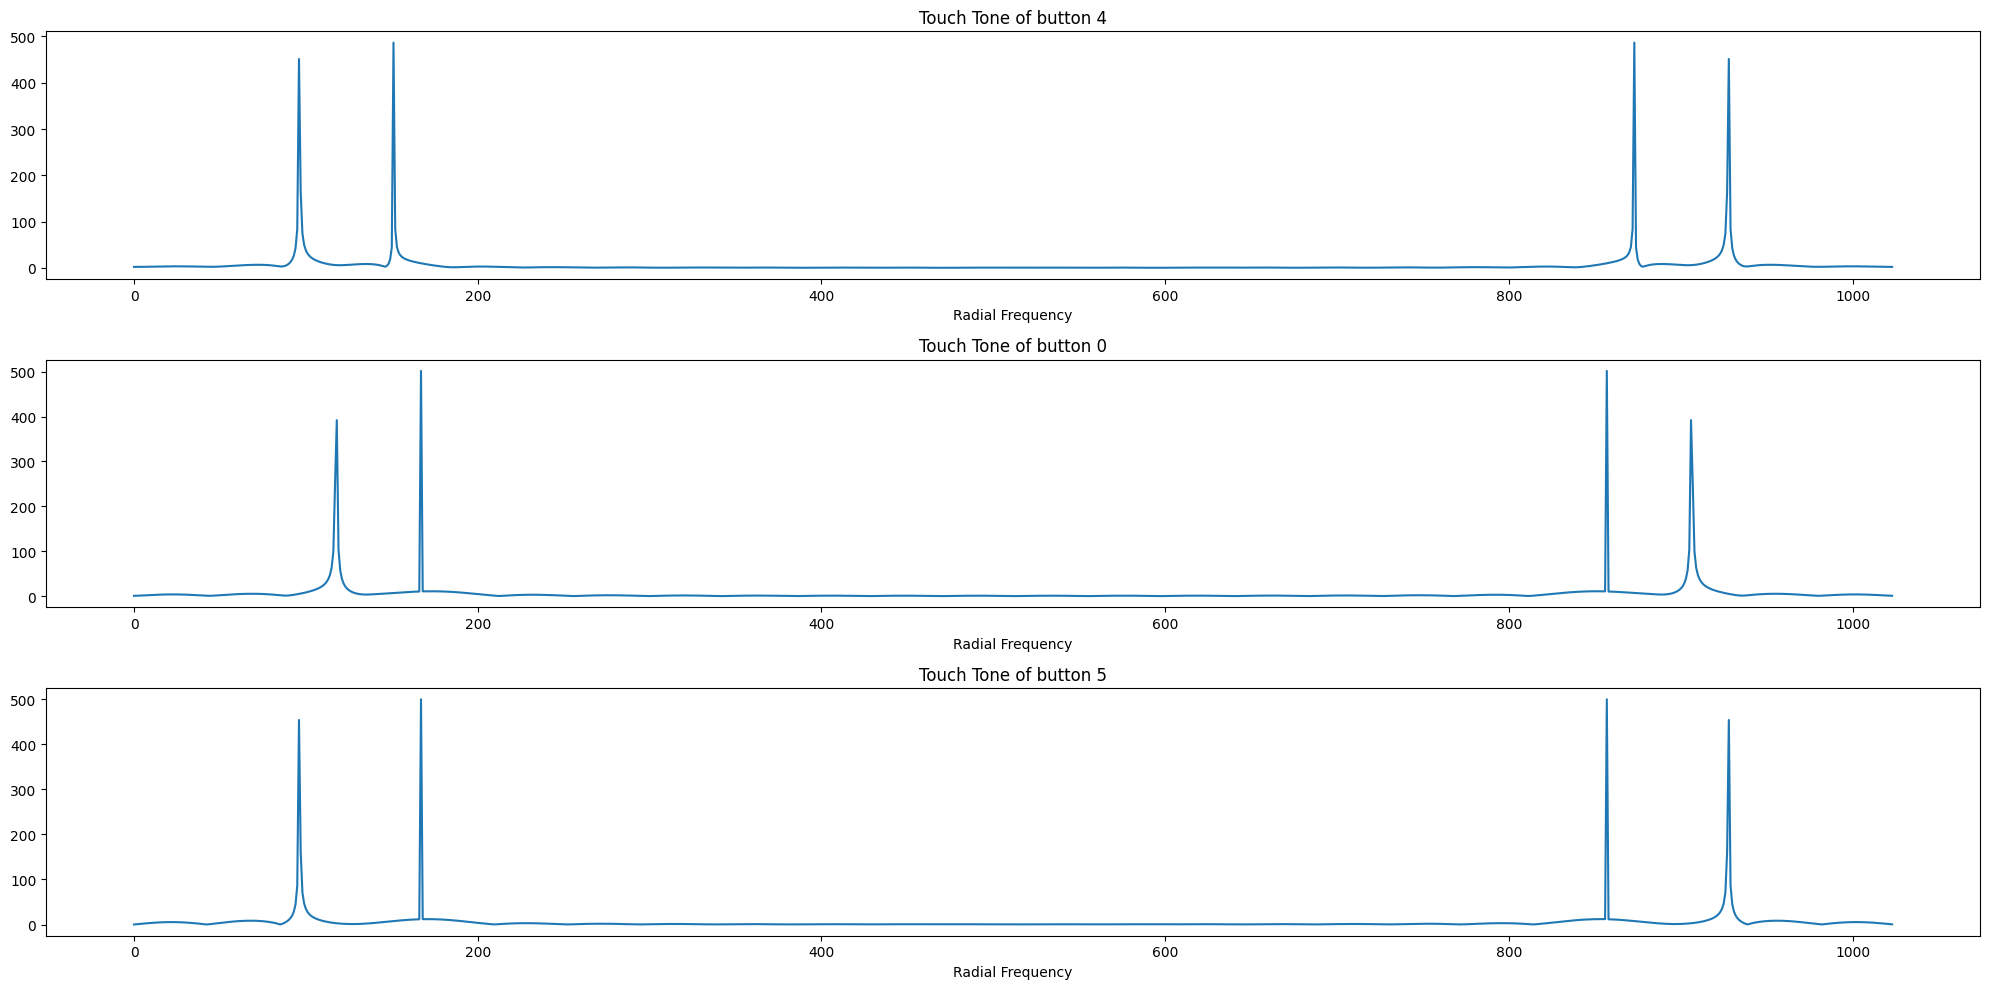

In [124]:
# 1.2

N = 1024

D4 = np.fft.fft(d[:, 4], N)
D5 = np.fft.fft(d[:, 5], N)
D0 = np.fft.fft(d[:, 0], N)

f = np.linspace(0, N-1, N)
fig = plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.plot(f, abs(D4))
plt.title('Touch Tone of button 4')
plt.xlabel('Radial Frequency')

plt.subplot(3, 1, 2)
plt.plot(f, abs(D0))
plt.title('Touch Tone of button 0')
plt.xlabel('Radial Frequency')

plt.subplot(3, 1, 3)
plt.plot(f, abs(D5))
plt.title('Touch Tone of button 5')
plt.xlabel('Radial Frequency')

plt.tight_layout()
plt.show()


In [125]:
## 1.3
# 03120017+03120065 = 06240082

num = [0, 6, 2, 4, 0, 0, 8, 2]
totalSignal = []
for i in num:
    ith_signal = d[:, i]
    totalSignal.extend(ith_signal)
    totalSignal.extend(np.zeros(100))

#totalSignal = np.array(totalSignal)
sf.write("tone_sequence.wav", totalSignal, samplerate)
IPython.display.display(IPython.display.Audio(totalSignal,rate=samplerate))

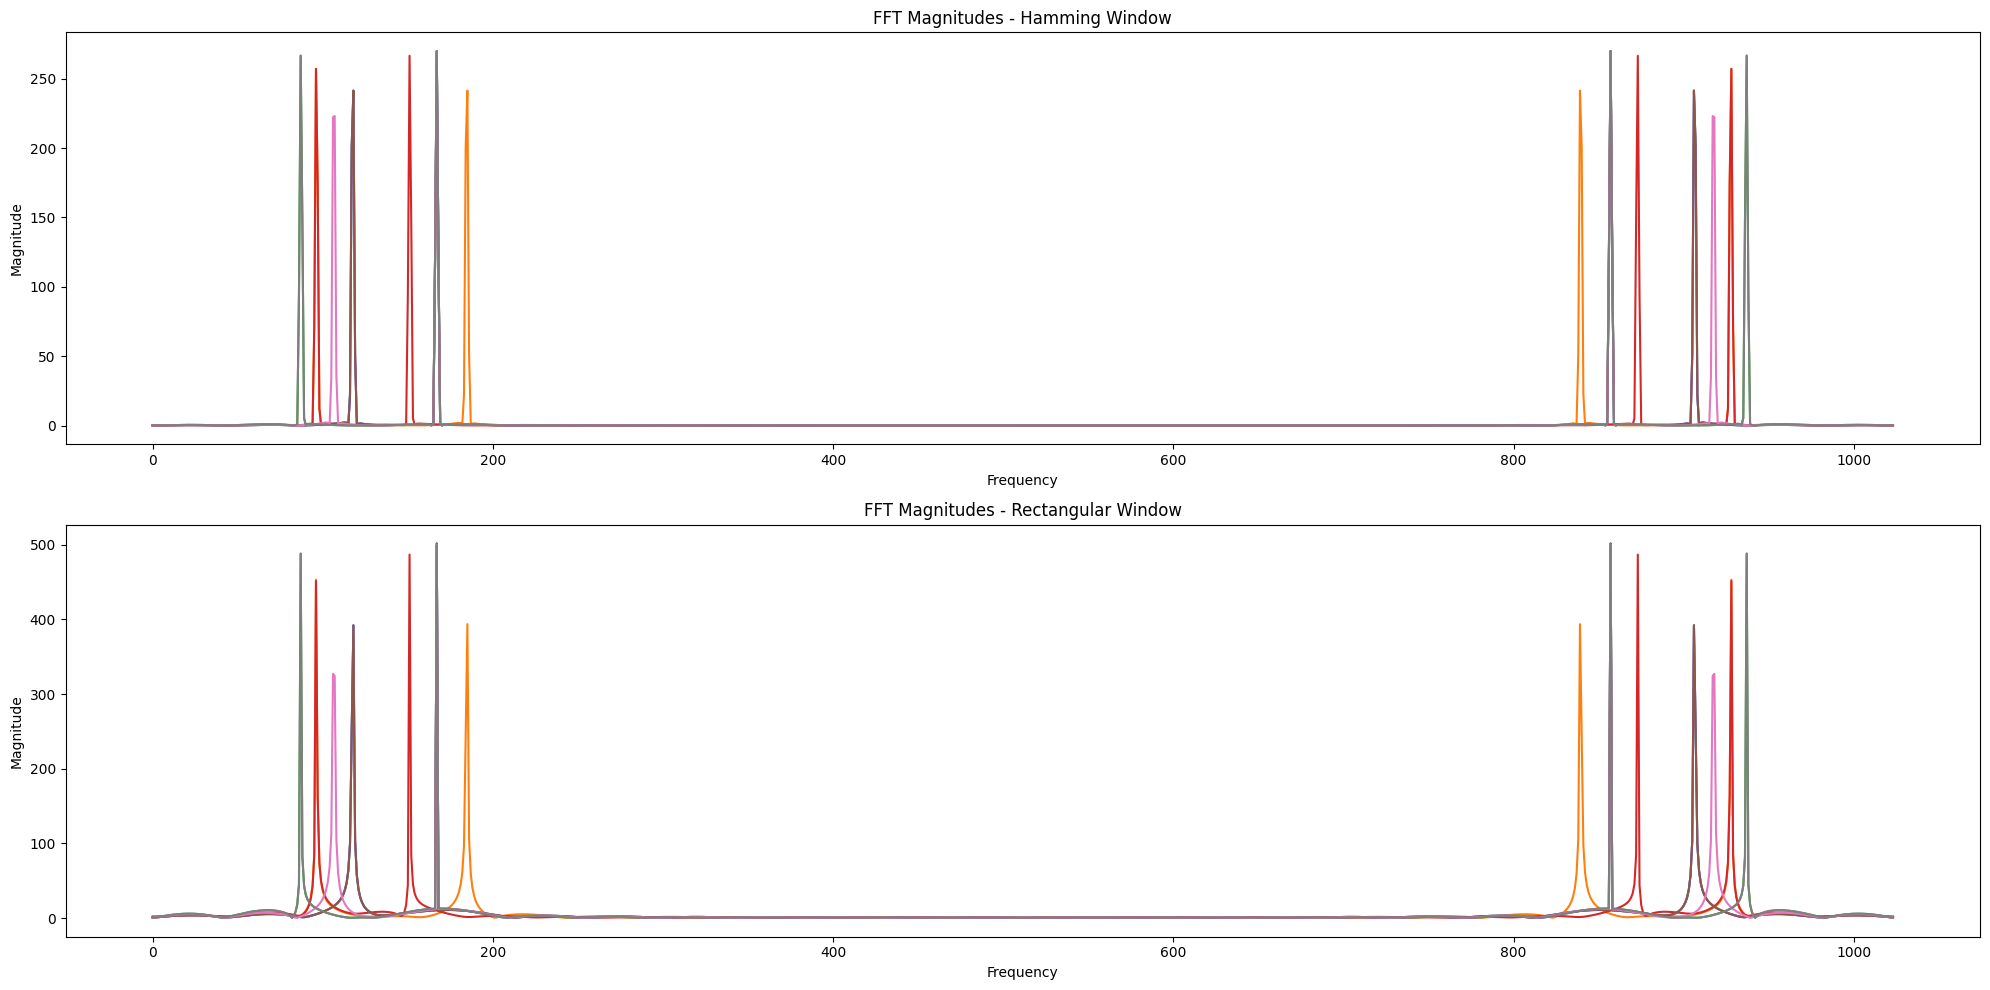

In [126]:
## 1.4

from scipy.signal.windows import boxcar

# Define parameters
L = 1000  # Length of each window
N = 1024  # FFT size
hop_size = 100  # Hop size between windows

# Create Hamming and rectangular windows
hamming = np.hamming(L)
rectangular = boxcar(L)

# Initialize lists to store FFT results
TS_h_list = []
TS_r_list = []

# Create two separate subplots for TS_h and TS_r
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Segment total signal into windows, apply windows, and compute FFT
for i in range(0, len(totalSignal), L+hop_size):
    window_h = totalSignal[i:i+L] * hamming
    window_r = totalSignal[i:i+L] * rectangular
    TS_h = np.fft.fft(window_h, N)
    TS_r = np.fft.fft(window_r, N)
    TS_h = np.abs(TS_h)
    TS_r = np.abs(TS_r)
    axes[0].plot(TS_h)  # Plot TS_h in the first subplot
    axes[1].plot(TS_r)  # Plot TS_r in the second subplot
    TS_h_list.append(TS_h)
    TS_r_list.append(TS_r)

TS_h_list = np.array(TS_h_list)
TS_r_list = np.array(TS_r_list)
# Add titles and labels
axes[0].set_title('FFT Magnitudes - Hamming Window')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Magnitude')
axes[1].set_title('FFT Magnitudes - Rectangular Window')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Magnitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [127]:
## 1.5

# Input: Array of frequencies (k)
# Output: Array only of the normalized frequencies which are close to the tone frequencies 
# -- not dulpicate values --
def getTonesFromFreqs_noDuplicates(givenlist, N = 1024):
    freq = [0.5346, 0.5906, 0.6535, 0.7217, 0.9273, 1.0247, 1.1328]
    givenlist = [(x * 2 * np.pi / N) for x in givenlist]
    middle_points = [0]*8
    tones = set() #set

    for i in range(6):
        x = (freq[i]+freq[i+1])/2
        middle_points[i+1] = x
        #print(x - freq[i])

    middle_points[0] = freq[0] - 0.028
    middle_points[7] = freq[6] + 0.055
    #print(middle_points)

    for k in givenlist:
        for i in range(7):
            if (k > middle_points[i] and k < middle_points[i+1]):
                k = freq[i]
                tones.add(k)
                break
    return tones


# -- testing --
u = 1/(np.pi * 2)
ks = [0.5 , 0.6, 0.8, 0.342, 0.134, 1.234, 0.134, 1.243] # just an example for testing
ks = [(x * u * N) for x in ks]

print(getTonesFromFreqs_noDuplicates(ks))

{0.5906, 0.7217}


In [128]:
## 1.5

# Input: Array of frequencies (k)
# Output: Array only of the normalized frequencies which are close to the tone frequencies 
# -- not dulpicate values --
def getTonesFromFreqs_noDuplicates(givenlist, N = 1024):
    freq = [0.5346, 0.5906, 0.6535, 0.7217, 0.9273, 1.0247, 1.1328]
    givenlist = [(x * 2 * np.pi / N) for x in givenlist]
    middle_points = [0]*8
    tones = set() #set

    for i in range(6):
        x = (freq[i]+freq[i+1])/2
        middle_points[i+1] = x
        #print(x - freq[i])

    middle_points[0] = freq[0] - 0.028
    middle_points[7] = freq[6] + 0.055
    #print(middle_points)

    for k in givenlist:
        for i in range(7):
            if (k > middle_points[i] and k < middle_points[i+1]):
                k = freq[i]
                tones.add(k)
                break
    return tones


# -- testing --
u = 1/(np.pi * 2)
ks = [0.5 , 0.6, 0.8, 0.342, 0.134, 1.234, 0.134, 1.243] # just an example for testing
ks = [(x * u * N) for x in ks]

print(getTonesFromFreqs_noDuplicates(ks))

{0.5906, 0.7217}


In [129]:
## 1.6

def getTonesEnergy(signal, L=1000, N=1024):
    hamming = np.hamming(L)
    f = np.linspace(0, N-1, N)
    if(len(signal)>9000):
        length = 10
    else:
        length = 8
    start_idx = 0
    signalsTones_h = np.zeros((L, length))
    for i in range(length):
        end_idx = start_idx + 1000    
        signalsTones_h[:, i] = hamming*(signal[start_idx:end_idx])
        start_idx += 1100

    Energy_ST_h = np.zeros((N, length))

    for i in range(length):
        Energy_ST_h[:, i] = abs(np.fft.fft(signalsTones_h[:, i], N))**2
   
    return Energy_ST_h

## -- TTDECODE --
def ttdecode(signal):
    energy_tones = getTonesEnergy(signal)
    Vector = []
    flag = False
    indexes = []
    length = energy_tones.shape[1]

    for i in range(length):
        indexes.append([])

    for j in range(length):
        goToSecond = False
        maxValue1 = 0
        maxValue2 = 0
        index1 = 0
        index2 = 0
        limit = 10000
        goToSecond = False
        for i in range(energy_tones.shape[0]):
            normalizedFreqs = []

            if goToSecond is False:
                if (energy_tones[i, j] > limit and not flag):
                    flag = True
                    #if(maxValue < energy_tones[i, j]):
                if flag:
                    if energy_tones[i, j] < limit:
                        goToSecond = True
                        flag = False
                    else:
                        if(maxValue1 < energy_tones[i, j]):
                            maxValue1 = energy_tones[i, j]
                            index1 = i
            elif goToSecond:
                if (energy_tones[i, j] > limit and not flag):
                    flag = True
                    #if(maxValue < energy_tones[i, j]):
                if flag:
                    if energy_tones[i, j] < limit:
                        flag = False
                        break
                    else:
                        if(maxValue2 < energy_tones[i, j]):
                            maxValue2 = energy_tones[i, j]
                            index2 = i 
        normalizedFreqs.append(index1)
        normalizedFreqs.append(index2)
        digits_freqs_set = getTonesFromFreqs_noDuplicates(normalizedFreqs)
        digits_freqs = list(digits_freqs_set)

        index = 0
        w = [] # list [[w_row_4, w_column_2], [w_row_1, w_column_1], ..., [w_row_3, w_column_3]]


        for i in range(10):
            w.append([])

        k = 1
        for i in range(3):
            for j in range(3):
                w[k].append(w_row[i])
                w[k].append(w_column[j])
                k += 1

        w[0].append(w_row[3])
        w[0].append(w_column[1])
        for freqsCouple in w:
            if digits_freqs == freqsCouple:
                Vector.append(index)
                break
            index += 1
    return Vector


print(ttdecode(totalSignal))    


[0, 6, 2, 4, 0, 0, 8, 2]


In [130]:
## 1.7

easy_sig = np.load('./dsp24_lab1_Data/easy_sig.npy')
vec1 = ttdecode(easy_sig)
print(vec1)

medium_sig = np.load('./dsp24_lab1_Data/medium_sig.npy')
vec3 = ttdecode(medium_sig)
print(vec3)

hard_sig = np.load('./dsp24_lab1_Data/hard_sig.npy')
vec2 = ttdecode(hard_sig)
print(vec2)

[9, 3, 9, 2, 6, 8, 4, 8]
[2, 7, 3, 3, 2, 5, 4, 2, 5, 4]
[6, 9, 2, 6, 3, 1, 9, 9, 1, 0]


**Μέρος 2ο - Χαρακτηριστικά Βραχέος Χρόνου Σημάτων Φωνής και Μουσικής**

27956


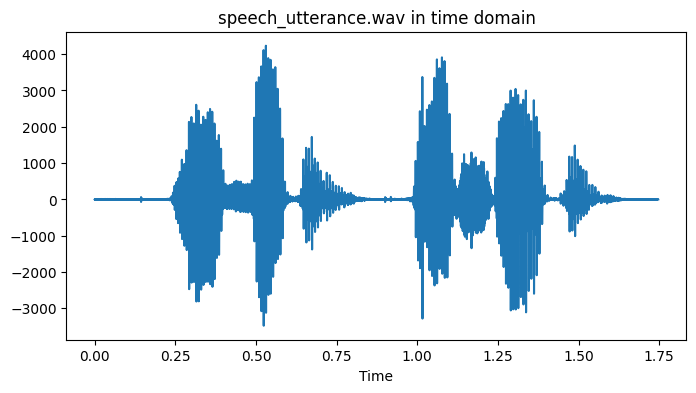

In [131]:
## 2.1

fs, signal = sp.io.wavfile.read('./dsp24_lab1_Data/speech_utterance.wav') # fs: sampling freq, speech: the audio array

time = np.arange(len(signal))/fs
fig = plt.figure(figsize=(8, 4))
plt.plot(time, signal)
plt.xlabel('Time')
plt.title('speech_utterance.wav in time domain')
print(len(signal))
IPython.display.display(IPython.display.Audio(signal,rate=fs))

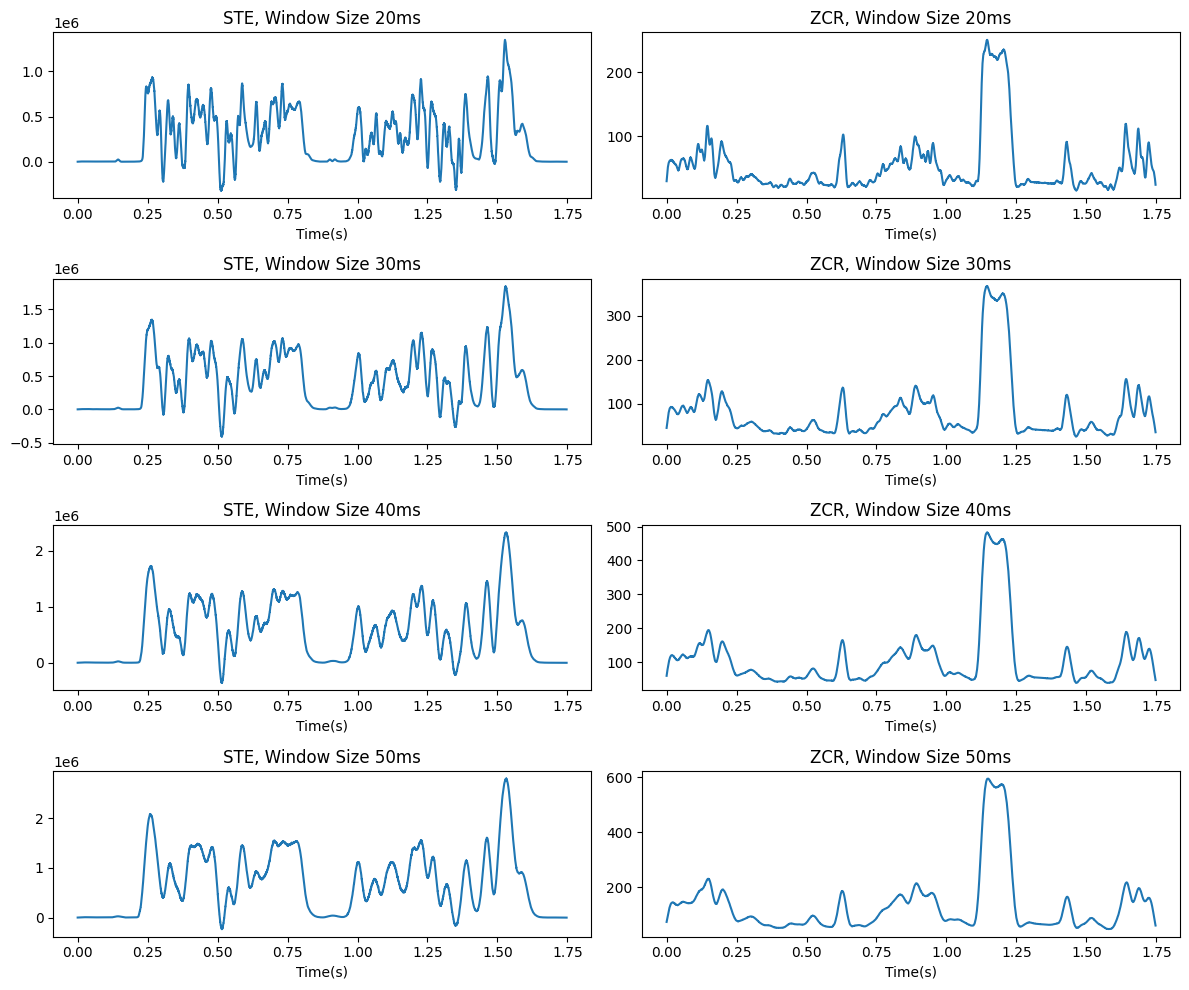

In [132]:
## 2.2

# Function to calculate short-time energy
def short_time_energy(signal, fs, windowDuration):
    windowSize = int(windowDuration * fs / 1000)
    window = np.hamming(windowSize)
    ShortTimeEnergy = []
    signal_squared = signal**2
    ShortTimeEnergy = np.convolve(signal_squared, window, mode='same')
    return ShortTimeEnergy

def zero_crossings_rate(signal, fs, windowDuration):
    windowSize = int(windowDuration * fs / 1000)
    window = np.hamming(windowSize)
    signal_padded = np.pad(signal, (0, 1), mode='constant', constant_values=0)
    signal_rolled = np.roll(signal_padded, 1)
    diff_signs = abs(np.sign(signal_padded)-np.sign(signal_rolled))
    ZeroCrossingsRate = np.convolve(diff_signs, window, mode='same')
    return ZeroCrossingsRate[:-1]

STE = []
ZCR = []

windowDurations = [20, 30, 40, 50]

# -- Hamming --
for duration in windowDurations:
    STE.append(short_time_energy(signal, fs, duration))
    ZCR.append(zero_crossings_rate(signal, fs, duration))

ffig, axs = plt.subplots(4, 2, figsize=(12, 10))

# Plot Short Time Energy
for i in range(len(windowDurations)):
    axs[i, 0].plot(time, STE[i])
    axs[i, 0].set_xlabel('Time(s)')
    axs[i, 0].set_title(f'STE, Window Size {windowDurations[i]}ms')

# Plot Zero Crossing Rate
for i in range(len(windowDurations)):
    axs[i, 1].plot(time, ZCR[i])
    axs[i, 1].set_xlabel('Time(s)')
    axs[i, 1].set_title(f'ZCR, Window Size {windowDurations[i]}ms')

plt.tight_layout()
plt.show()

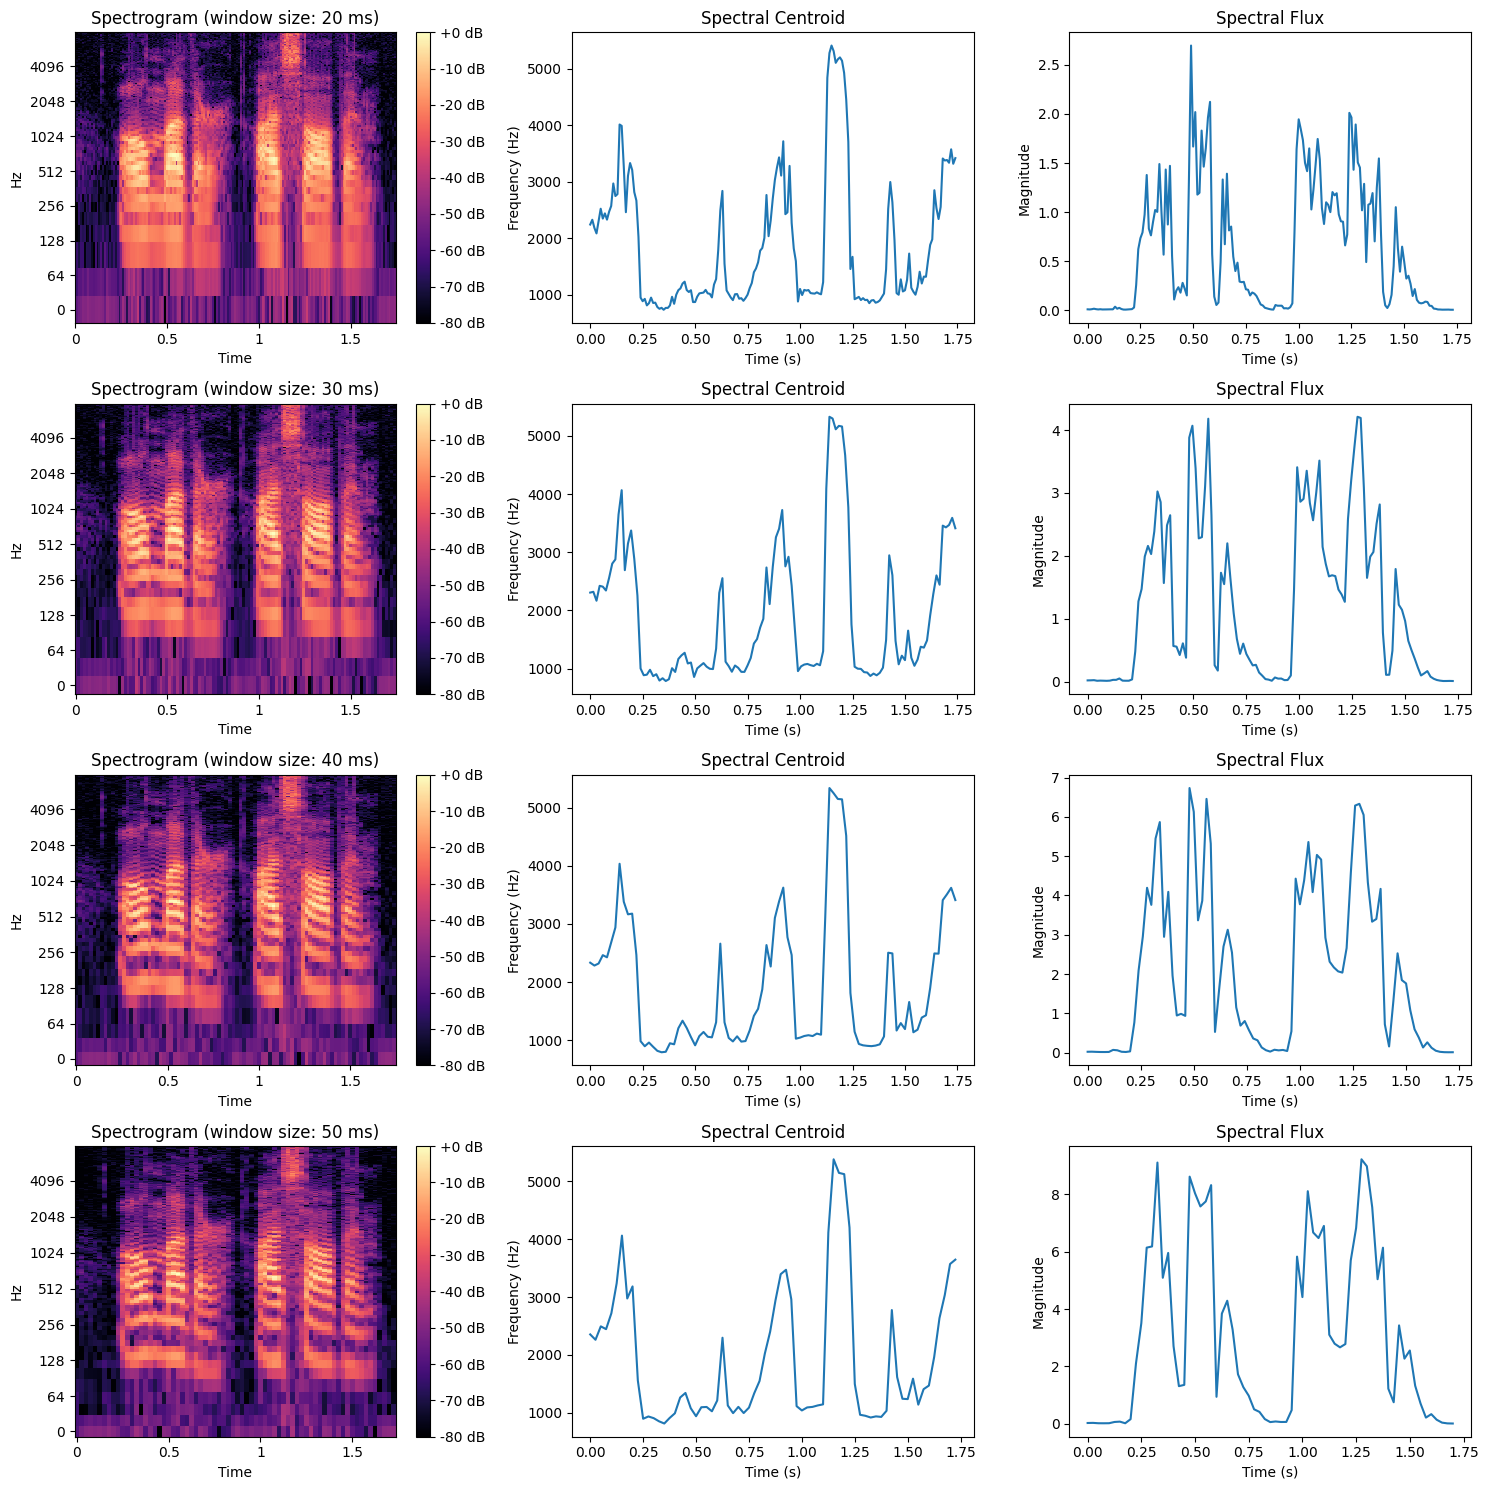

In [133]:
## 2.3

import librosa


# Load the signal using librosa
signal, fs = librosa.load('./dsp24_lab1_Data/speech_utterance.wav', sr=None)

# Define a list of window sizes to iterate over
window_sizes_ms = [20, 30, 40, 50]  # Window sizes in milliseconds

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Iterate over each window size
for i, window_size_ms in enumerate(window_sizes_ms):
    # Calculate the STFT
    window_size = int(window_size_ms * fs / 1000)
    hop_length = window_size // 2  # Default hop length is half the window size
    stft = librosa.stft(signal, n_fft=window_size, hop_length=hop_length, window='hamming')

    # Convert to magnitude spectrogram and apply dB scale
    magnitude_spectrogram = np.abs(stft)
    magnitude_spectrogram_db = librosa.amplitude_to_db(magnitude_spectrogram, ref=np.max)

    # Plot the spectrogram with log scale on y-axis
    im = librosa.display.specshow(magnitude_spectrogram_db, sr=fs, hop_length=hop_length, ax=axes[i, 0], x_axis='time', y_axis='log')
    axes[i, 0].set_title(f'Spectrogram (window size: {window_size_ms} ms)')

    # Add colorbar to the spectrogram plot
    fig.colorbar(im, ax=axes[i, 0], format='%+2.0f dB')

    # Calculate spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(S=magnitude_spectrogram, sr=fs)[0]

    # Calculate spectral flux
    spectral_flux = np.sqrt(np.sum(np.diff(magnitude_spectrogram, axis=1)**2, axis=0))

    # Plot the spectral centroid
    axes[i, 1].plot(np.arange(len(spectral_centroid)) * hop_length / fs, spectral_centroid)
    axes[i, 1].set_title('Spectral Centroid')
    axes[i, 1].set_xlabel('Time (s)')
    axes[i, 1].set_ylabel('Frequency (Hz)')

    # Plot the spectral flux
    axes[i, 2].plot(np.arange(len(spectral_flux)) * hop_length / fs, spectral_flux)
    axes[i, 2].set_title('Spectral Flux')
    axes[i, 2].set_xlabel('Time (s)')
    axes[i, 2].set_ylabel('Magnitude')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

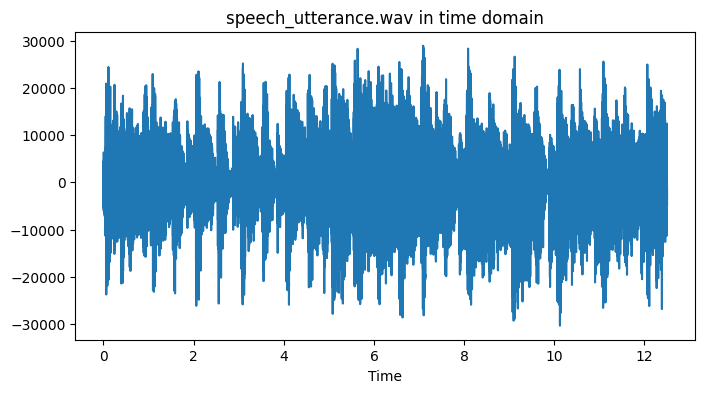

In [134]:
## 2.4.1

fs, music = sp.io.wavfile.read('./dsp24_lab1_Data/music.wav')

time = np.arange(len(music))/fs
fig = plt.figure(figsize=(8, 4))
plt.plot(time, music)
plt.xlabel('Time')
plt.title('speech_utterance.wav in time domain')
IPython.display.display(IPython.display.Audio(music,rate=fs))

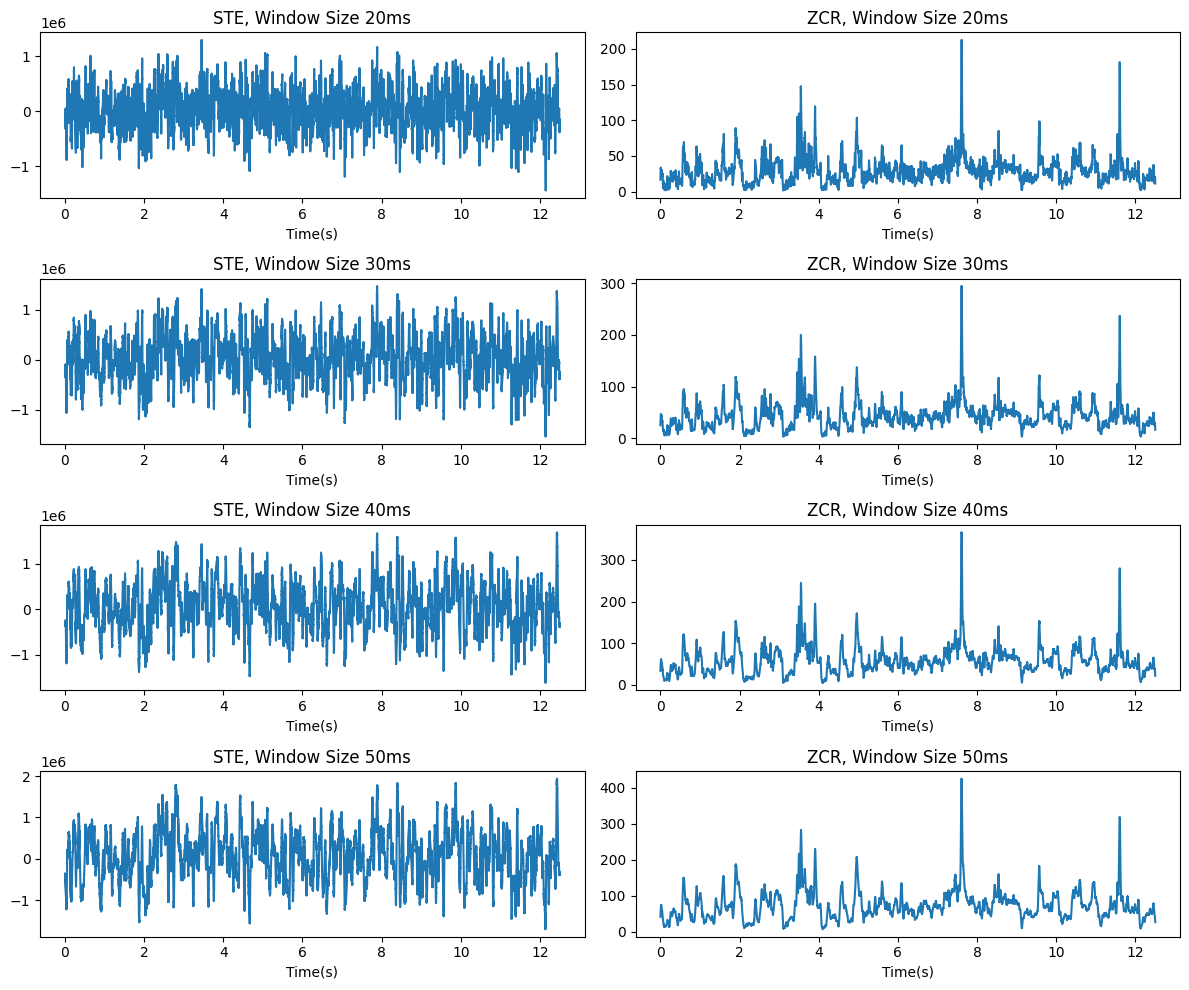

In [135]:
## 2.4.2

# Function to calculate short-time energy
def short_time_energy(signal, fs, windowDuration):
    windowSize = int(windowDuration * fs / 1000)
    window = np.hamming(windowSize)
    ShortTimeEnergy = []
    signal_squared = signal**2
    ShortTimeEnergy = np.convolve(signal_squared, window, mode='same')
    return ShortTimeEnergy

def zero_crossings_rate(signal, fs, windowDuration):
    windowSize = int(windowDuration * fs / 1000)
    window = np.hamming(windowSize)
    signal_padded = np.pad(signal, (0, 1), mode='constant', constant_values=0)
    signal_rolled = np.roll(signal_padded, 1)
    diff_signs = abs(np.sign(signal_padded)-np.sign(signal_rolled))
    ZeroCrossingsRate = np.convolve(diff_signs, window, mode='same')
    return ZeroCrossingsRate[:-1]

STE = []
ZCR = []

windowDurations = [20, 30, 40, 50]

# -- Hamming --
for duration in windowDurations:
    STE.append(short_time_energy(music, fs, duration))
    ZCR.append(zero_crossings_rate(music, fs, duration))

ffig, axs = plt.subplots(4, 2, figsize=(12, 10))

# Plot Short Time Energy
for i in range(len(windowDurations)):
    axs[i, 0].plot(time, STE[i])
    axs[i, 0].set_xlabel('Time(s)')
    axs[i, 0].set_title(f'STE, Window Size {windowDurations[i]}ms')

# Plot Zero Crossing Rate
for i in range(len(windowDurations)):
    axs[i, 1].plot(time, ZCR[i])
    axs[i, 1].set_xlabel('Time(s)')
    axs[i, 1].set_title(f'ZCR, Window Size {windowDurations[i]}ms')

plt.tight_layout()
plt.show()

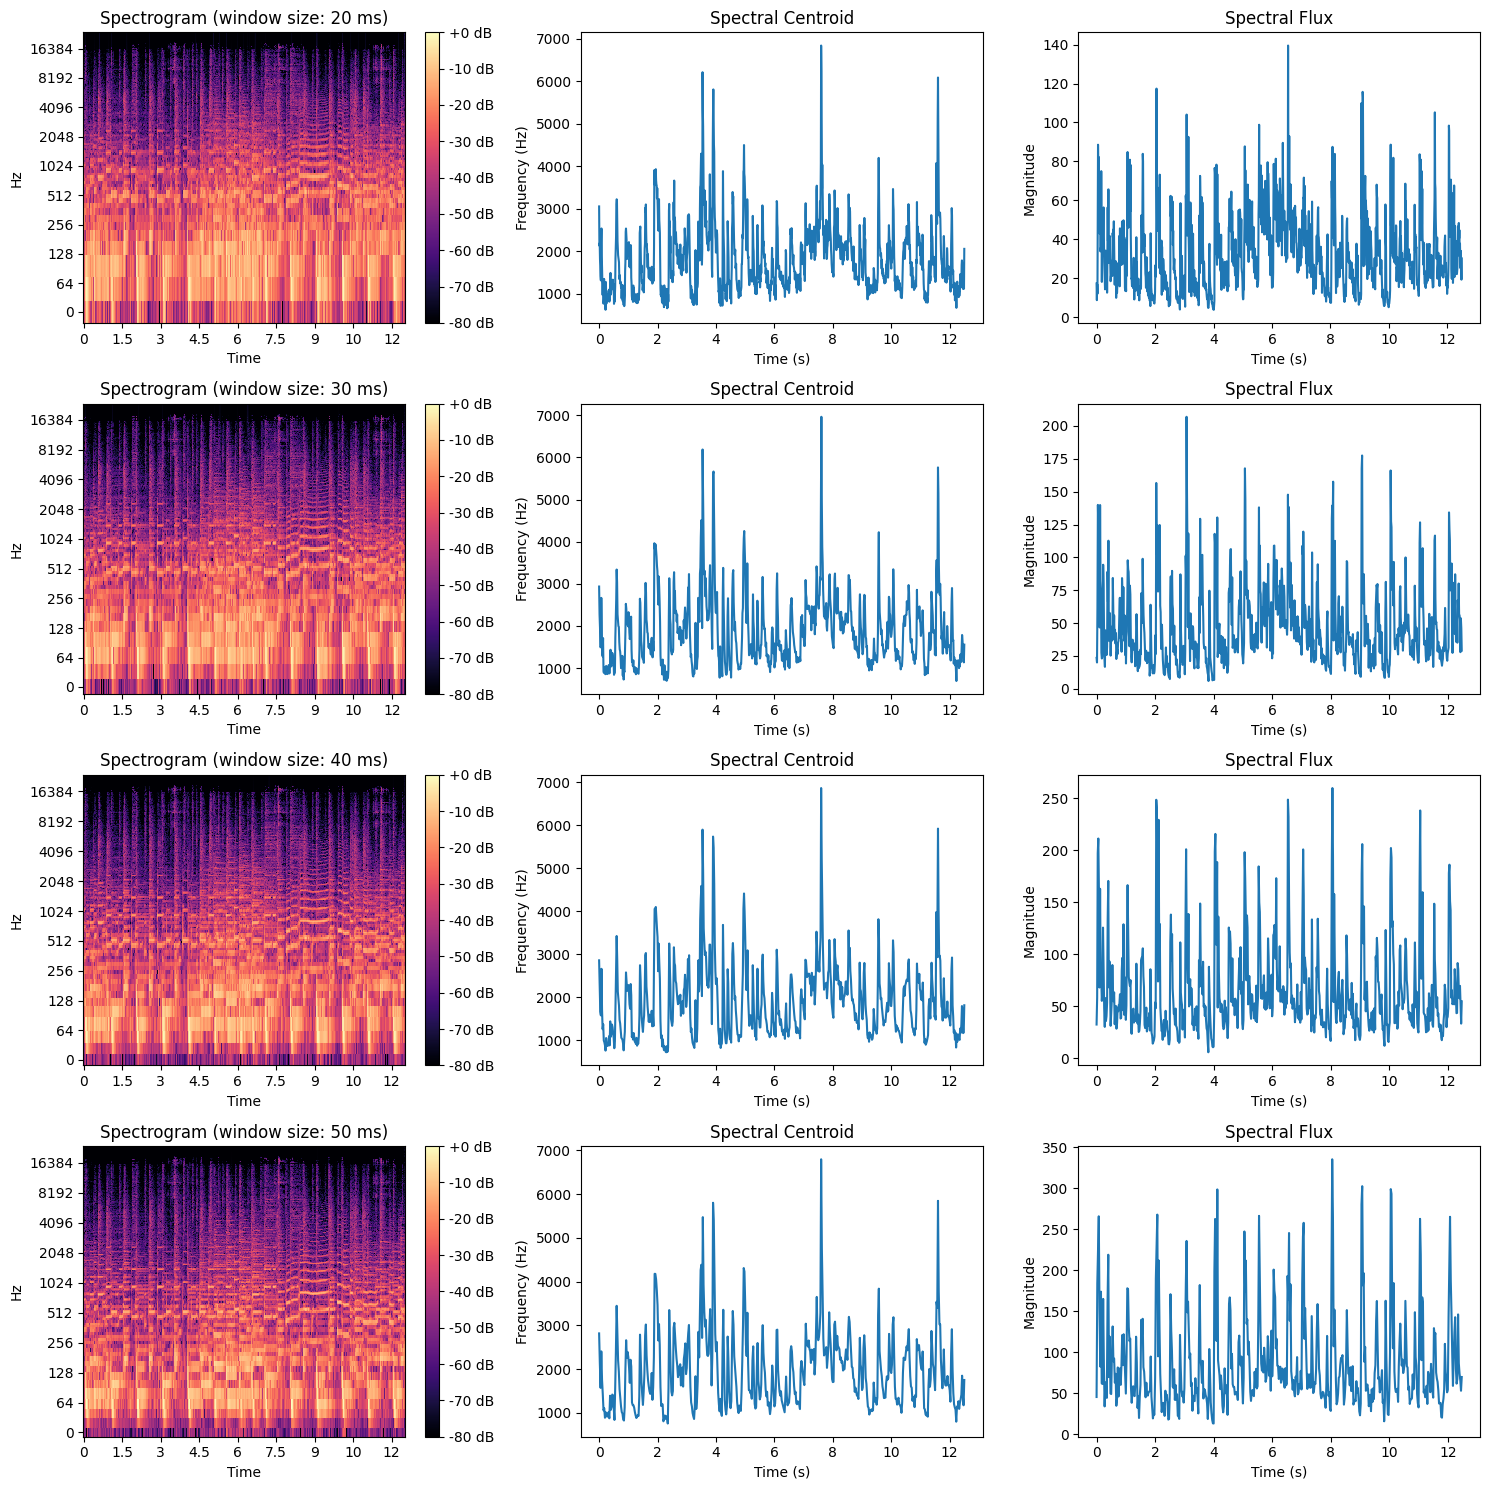

In [136]:
## 2.4.3

import librosa

# Load the signal using librosa
music, fs = librosa.load('./dsp24_lab1_Data/music.wav', sr=None)

# Define a list of window sizes to iterate over
window_sizes_ms = [20, 30, 40, 50]  # Window sizes in milliseconds

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Iterate over each window size
for i, window_size_ms in enumerate(window_sizes_ms):
    # Calculate the STFT
    window_size = int(window_size_ms * fs / 1000)
    hop_length = window_size // 2  # Default hop length is half the window size
    stft = librosa.stft(music, n_fft=window_size, hop_length=hop_length, window='hamming')

    # Convert to magnitude spectrogram and apply dB scale
    magnitude_spectrogram = np.abs(stft)
    magnitude_spectrogram_db = librosa.amplitude_to_db(magnitude_spectrogram, ref=np.max)

    # Plot the spectrogram with log scale on y-axis
    im = librosa.display.specshow(magnitude_spectrogram_db, sr=fs, hop_length=hop_length, ax=axes[i, 0], x_axis='time', y_axis='log')
    axes[i, 0].set_title(f'Spectrogram (window size: {window_size_ms} ms)')

    # Add colorbar to the spectrogram plot
    fig.colorbar(im, ax=axes[i, 0], format='%+2.0f dB')

    # Calculate spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(S=magnitude_spectrogram, sr=fs)[0]

    # Calculate spectral flux
    spectral_flux = np.sqrt(np.sum(np.diff(magnitude_spectrogram, axis=1)**2, axis=0))

    # Plot the spectral centroid
    axes[i, 1].plot(np.arange(len(spectral_centroid)) * hop_length / fs, spectral_centroid)
    axes[i, 1].set_title('Spectral Centroid')
    axes[i, 1].set_xlabel('Time (s)')
    axes[i, 1].set_ylabel('Frequency (Hz)')

    # Plot the spectral flux
    axes[i, 2].plot(np.arange(len(spectral_flux)) * hop_length / fs, spectral_flux)
    axes[i, 2].set_title('Spectral Flux')
    axes[i, 2].set_xlabel('Time (s)')
    axes[i, 2].set_ylabel('Magnitude')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

***Μέρος 3ο - Ψηφιακή Επεξεργασία και Φασματική Ανάλυση Βιοσημάτων Κητωδών***

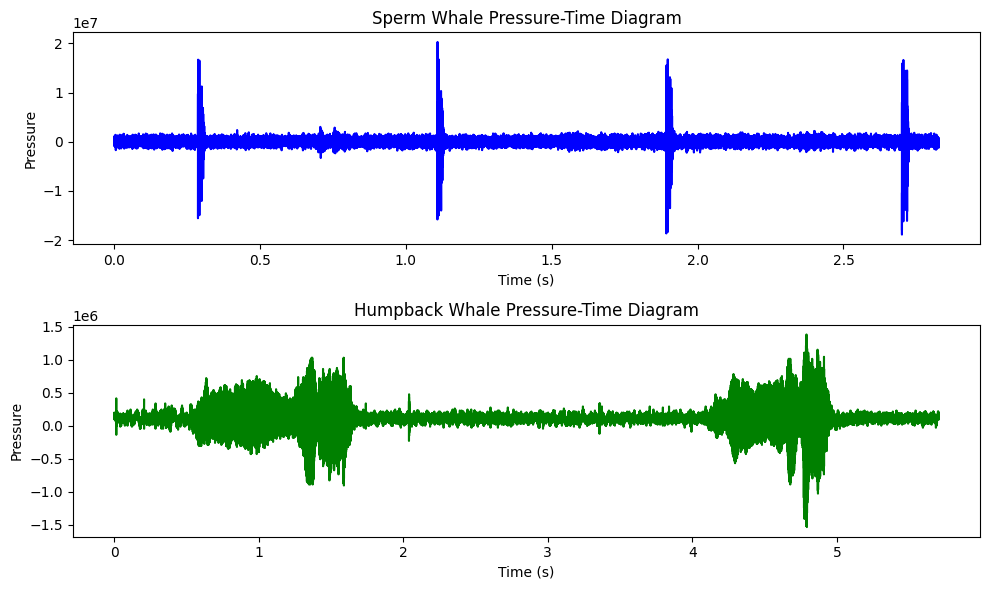

In [137]:
## 3.1

import librosa

# Function to convert voltage signals to pressure signals
def voltage_to_pressure(signal, gain_factor=0.16, sensitivity=-155):
    pressure = 3.5 * signal * gain_factor * 10**(-sensitivity/20)
    return pressure

# Load the raw whale bio-signals with their respective sample rates
sperm_whale_signal, sr_sperm_whale = librosa.load('./dsp24_lab1_Data/85005006.wav', sr=None)
humpback_whale_signal, sr_humpback_whale = librosa.load('./dsp24_lab1_Data/9220100Q.wav', sr=None)

# Convert voltage signals to pressure signals using the respective sample rates
sperm_whale_pressure = voltage_to_pressure(sperm_whale_signal)
humpback_whale_pressure = voltage_to_pressure(humpback_whale_signal)

# Calculate the time axis based on the length of each signal and its respective sample rate
time_sperm_whale = np.arange(len(sperm_whale_signal)) / sr_sperm_whale
time_humpback_whale = np.arange(len(humpback_whale_signal)) / sr_humpback_whale

# Plot Pressure-Time diagram
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time_sperm_whale, sperm_whale_pressure, color='blue')
plt.title('Sperm Whale Pressure-Time Diagram')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')

plt.subplot(2, 1, 2)
plt.plot(time_humpback_whale, humpback_whale_pressure, color='green')
plt.title('Humpback Whale Pressure-Time Diagram')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')

plt.tight_layout()
plt.show()

In [138]:
## 3.2

# Calculate RMS of pressure
def calculate_rms(pressure):
    rms = np.sqrt(np.mean(pressure**2))
    return rms

# Calculate Sound Pressure Level (SPL)
def calculate_spl(rms_pressure, pref=1e-6):
    spl_rms = 20 * np.log10(rms_pressure / pref)
    return spl_rms

# Calculate RMS for Sperm whale and Humpback whale pressure signals
rms_sperm_whale = calculate_rms(sperm_whale_pressure)
rms_humpback_whale = calculate_rms(humpback_whale_pressure)

# Calculate SPL for Sperm whale and Humpback whale pressure signals
spl_sperm_whale = calculate_spl(rms_sperm_whale)
spl_humpback_whale = calculate_spl(rms_humpback_whale)

print("RMS Pressure for Sperm Whale:", rms_sperm_whale)
print("RMS Pressure for Humpback Whale:", rms_humpback_whale)

print("SPL for Sperm Whale:", spl_sperm_whale, "dB")
print("SPL for Humpback Whale:", spl_humpback_whale, "dB")


RMS Pressure for Sperm Whale: 784971.1
RMS Pressure for Humpback Whale: 195801.56
SPL for Sperm Whale: 237.8970736321329 dB
SPL for Humpback Whale: 225.83632306317492 dB


In [139]:
## 3.3

# Compute Discrete Fourier Transform (DFT)
def compute_dft(signal):
    return np.fft.fft(signal)

# Calculate Parseval's theorem for a given pressure signal
def verify_parseval_theorem(signal):
    # Compute DFT
    dft_signal = compute_dft(signal)
    
    # Square of magnitudes in time domain
    squared_magnitude_time = np.abs(signal)**2
    
    # Square of magnitudes in frequency domain
    squared_magnitude_freq = np.abs(dft_signal)**2
    
    # Sum of squared magnitudes in both domains
    sum_squared_magnitude_time = np.sum(squared_magnitude_time)
    sum_squared_magnitude_freq = np.sum(squared_magnitude_freq) / len(signal)  # Normalization by N
    
    return sum_squared_magnitude_time, sum_squared_magnitude_freq

# Choose one of the pressure signals (e.g., Sperm Whale) to verify Parseval's theorem
signal_to_verify = sperm_whale_pressure

# Verify Parseval's theorem
sum_squared_magnitude_time, sum_squared_magnitude_freq = verify_parseval_theorem(signal_to_verify)

print("Sum of squared magnitudes in time domain:", sum_squared_magnitude_time)
print("Sum of squared magnitudes in frequency domain:", sum_squared_magnitude_freq)

Sum of squared magnitudes in time domain: 1.4267764e+17
Sum of squared magnitudes in frequency domain: 1.42677626774277e+17


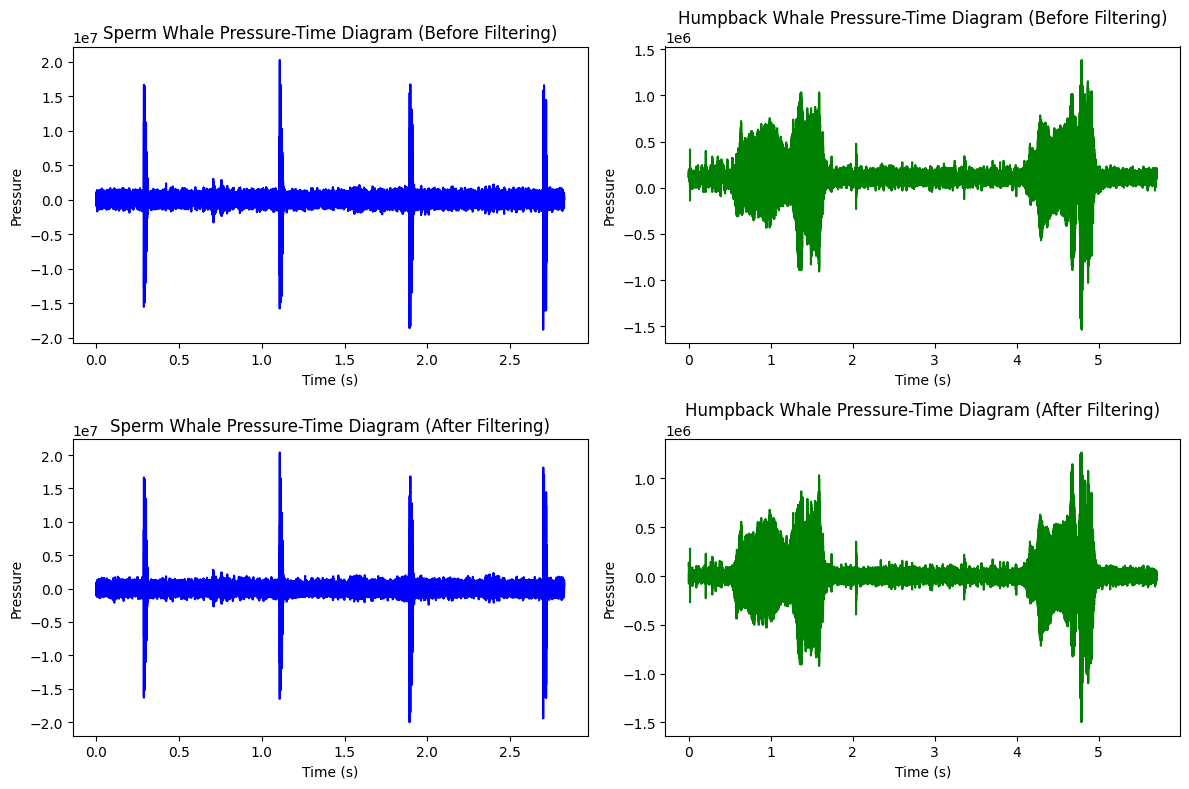

In [140]:
## 3.4

from scipy.signal import butter, lfilter

# Function to apply bandpass filter
def apply_bandpass_filter(data, lowcut, highcut, order=3):
    low = lowcut / highcut
    high = highcut / highcut
    high += -0.000001
    b, a = butter(order, [low, high], btype='band')
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Time axis
time_sperm_whale = np.arange(len(sperm_whale_pressure)) / sr_sperm_whale
time_humpback_whale = np.arange(len(humpback_whale_pressure)) / sr_humpback_whale

# Define cutoff frequencies for the bandpass filter
lowcut = 200  # Hz
highcut_sperm = 0.5 * sr_sperm_whale
highcut_humpback = 0.5 * sr_humpback_whale  # Nyquist frequency

# Apply bandpass filter to both bio-signals
sperm_whale_filtered = apply_bandpass_filter(sperm_whale_pressure, lowcut, highcut_sperm)
humpback_whale_filtered = apply_bandpass_filter(humpback_whale_pressure, lowcut, highcut_humpback)

# Plot Pressure-Time diagram before and after filtering for both bio-signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time_sperm_whale, sperm_whale_pressure, color='blue')
plt.title('Sperm Whale Pressure-Time Diagram (Before Filtering)')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')

plt.subplot(2, 2, 2)
plt.plot(time_humpback_whale, humpback_whale_pressure, color='green')
plt.title('Humpback Whale Pressure-Time Diagram (Before Filtering)')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')

plt.subplot(2, 2, 3)
plt.plot(time_sperm_whale, sperm_whale_filtered, color='blue')
plt.title('Sperm Whale Pressure-Time Diagram (After Filtering)')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')

plt.subplot(2, 2, 4)
plt.plot(time_humpback_whale, humpback_whale_filtered, color='green')
plt.title('Humpback Whale Pressure-Time Diagram (After Filtering)')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')

plt.tight_layout()
plt.show()

In [141]:
## 3.5

# Function to convert voltage signals to pressure signals
def voltage_to_pressure(signal, gain_factor=0.16, sensitivity=-175):
    pressure = 3.5 * signal * gain_factor * 10**(-sensitivity/20)
    return pressure

# Load the processed audio file
audio_file_path = './dsp24_lab1_Data/Pile driving.wav'  # Adjust the path accordingly
processed_signal, sr_processed = librosa.load(audio_file_path, sr=None)

# Convert voltage signals to pressure signals
processed_pressure = voltage_to_pressure(processed_signal)

# Calculate RMS Pressure
rms_processed = calculate_rms(processed_pressure)

# Calculate SPLrms in dB relative to 1μPa
pref = 1e-6  # 1μPa
SPLrms = calculate_spl(rms_processed)

# Check if SPLrms exceeds the threshold of 100 dB
threshold = 100  # dB relative to 1μPa

if SPLrms > threshold:
    print("The SPLrms of the processed audio file is equal to {} dB and exceeds the threshold ({} dB).".format(SPLrms, threshold))
    print("This could potentially affect the behavior of cetaceans.")
else:
    print("The SPLrms of the processed audio file is equal to {} dB and does not exceed the threshold ({} dB).".format(SPLrms,threshold))
    print("It may not significantly affect the behavior of cetaceans.")

The SPLrms of the processed audio file is equal to 285.15361603044954 dB and exceeds the threshold (100 dB).
This could potentially affect the behavior of cetaceans.


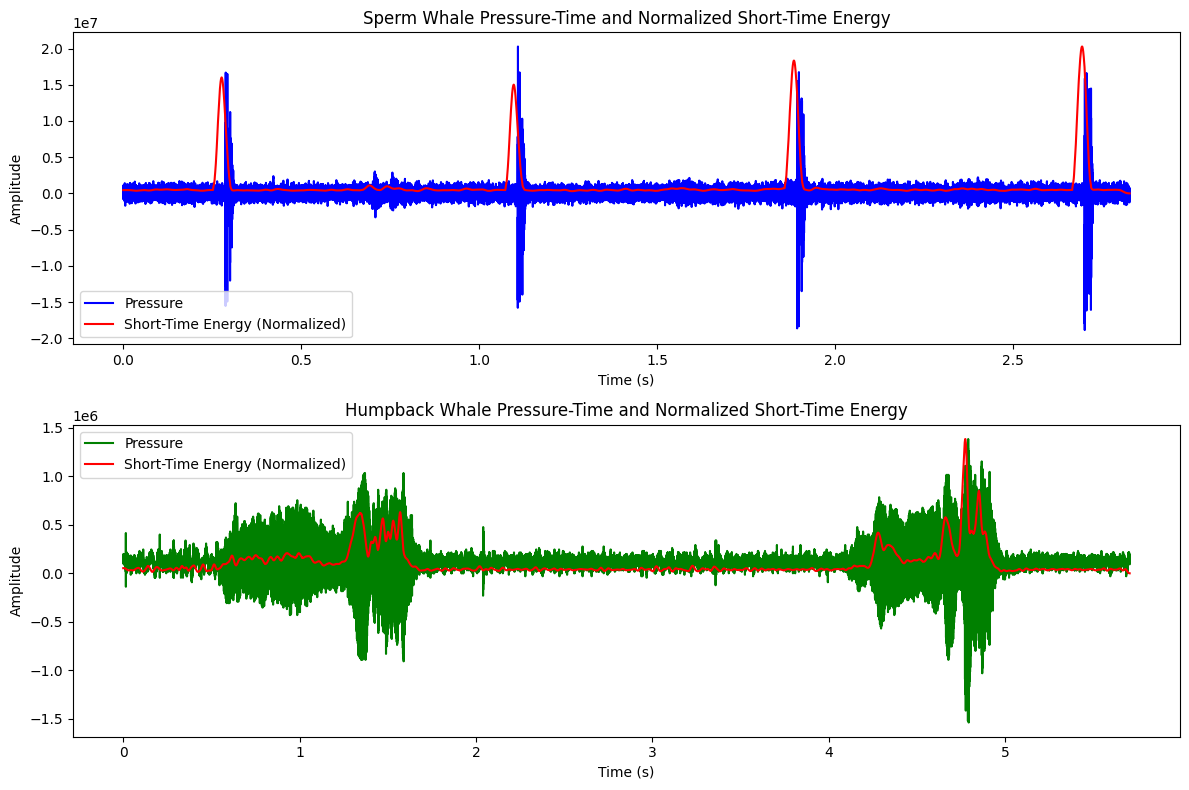

In [142]:
## 3.6

# Function to calculate short-time energy
def short_time_energy(signal, fs):
    ShortTimeEnergy = []
    windowSize = int(35 * fs / 1000)
    window = np.hamming(windowSize)
    # Pad the signal with zeros at the end
    signal_padded = np.pad(signal, (0, windowSize), mode='constant', constant_values=0)
    for m in range(0, len(signal)):
        Energy = sum((signal_padded[m:m+windowSize]**2) * window)
        ShortTimeEnergy.append(Energy)
    return ShortTimeEnergy

# Time axis
time_sperm_whale = np.arange(len(sperm_whale_signal)) / sr_sperm_whale
time_humpback_whale = np.arange(len(humpback_whale_signal)) / sr_humpback_whale

# Calculate short-time energy for both bio-signals
sperm_whale_energy = short_time_energy(sperm_whale_pressure, sr_sperm_whale)
humpback_whale_energy = short_time_energy(humpback_whale_pressure, sr_humpback_whale)

# Normalize energy signals
max_pressure_sperm_whale = np.max(sperm_whale_pressure)
max_pressure_humpback_whale = np.max(humpback_whale_pressure)
max_energy_sperm_whale = np.max(sperm_whale_energy)
max_energy_humpback_whale = np.max(humpback_whale_energy)

sperm_whale_energy_normalized = (sperm_whale_energy / max_energy_sperm_whale) * max_pressure_sperm_whale
humpback_whale_energy_normalized = (humpback_whale_energy / max_energy_humpback_whale) * max_pressure_humpback_whale

# Plot Pressure-Time diagram and Normalized Short-Time Energy for both bio-signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time_sperm_whale, sperm_whale_pressure, color='blue', label='Pressure')
plt.plot(time_sperm_whale[:len(sperm_whale_energy)], sperm_whale_energy_normalized, color='red', label='Short-Time Energy (Normalized)')
plt.title('Sperm Whale Pressure-Time and Normalized Short-Time Energy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_humpback_whale, humpback_whale_pressure, color='green', label='Pressure')
plt.plot(time_humpback_whale[:len(humpback_whale_energy)], humpback_whale_energy_normalized, color='red', label='Short-Time Energy (Normalized)')
plt.title('Humpback Whale Pressure-Time and Normalized Short-Time Energy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

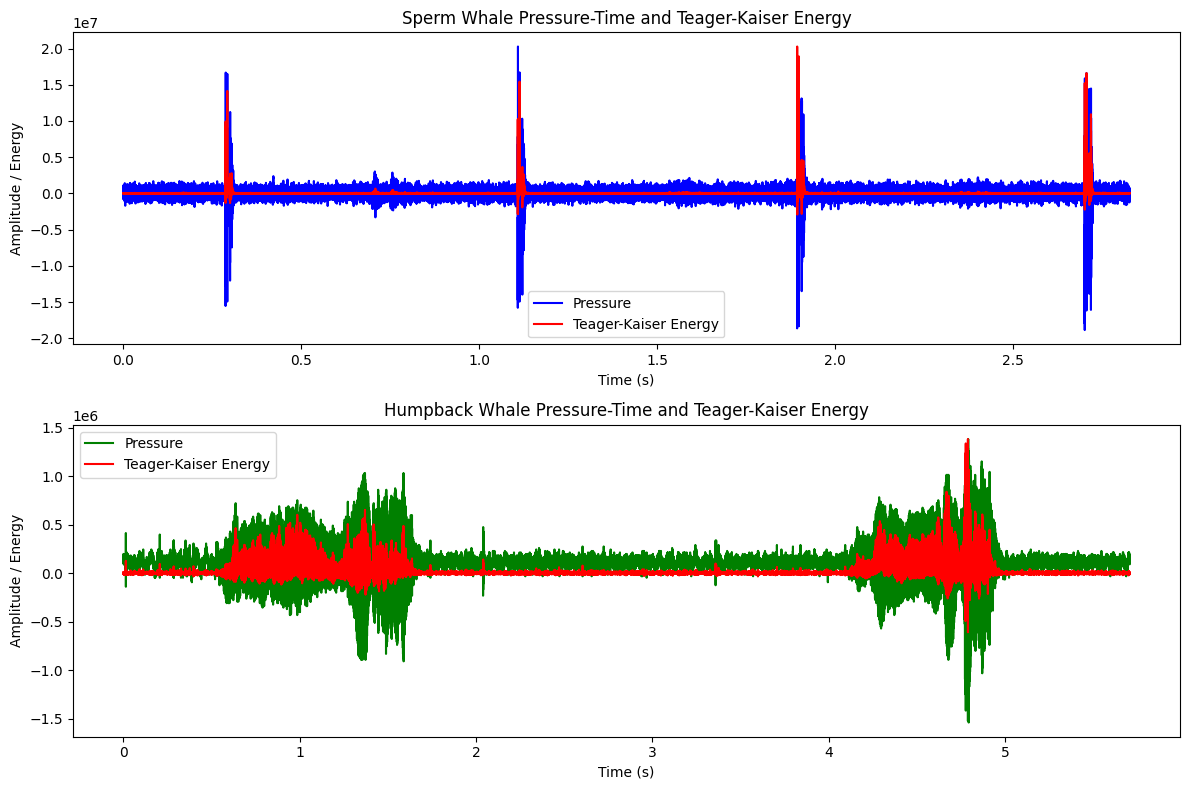

In [143]:
## 3.7

# Function to compute Teager-Kaiser Energy Operator (TEO)
def teager_kaiser_energy(signal):
    signal_padded = np.pad(signal, 1, mode='edge')
    signal_past = np.roll(signal_padded, 1)
    signal_future = np.roll(signal_padded, -1)
    teo = (signal_padded**2-signal_future*signal_past)
    return teo[1:-1]

# Calculate Teager-Kaiser Energy Operator (TEO) for both bio-signals
sperm_whale_teo = teager_kaiser_energy(sperm_whale_pressure)
humpback_whale_teo = teager_kaiser_energy(humpback_whale_pressure)

# Time axis
time_sperm_whale = np.arange(len(sperm_whale_pressure)) / sr_sperm_whale
time_humpback_whale = np.arange(len(humpback_whale_pressure)) / sr_humpback_whale

# Normalize energy signals
max_pressure_sperm_whale = np.max(sperm_whale_pressure)
max_pressure_humpback_whale = np.max(humpback_whale_pressure)
max_teo_sperm_whale = np.max(sperm_whale_teo)
max_teo_humpback_whale = np.max(humpback_whale_teo)

sperm_whale_teo_normalized = (sperm_whale_teo / max_teo_sperm_whale) * max_pressure_sperm_whale
#print(np.max(sperm_whale_pressure))
humpback_whale_teo_normalized = (humpback_whale_teo / max_teo_humpback_whale) * max_pressure_humpback_whale

# Plot Pressure-Time diagram and Teager-Kaiser Energy Operator for both bio-signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time_sperm_whale, sperm_whale_pressure, color='blue', label='Pressure')
plt.plot(time_sperm_whale, sperm_whale_teo_normalized, color='red', label='Teager-Kaiser Energy')
plt.title('Sperm Whale Pressure-Time and Teager-Kaiser Energy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Energy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_humpback_whale, humpback_whale_pressure, color='green', label='Pressure')
plt.plot(time_humpback_whale, humpback_whale_teo_normalized, color='red', label='Teager-Kaiser Energy')
plt.title('Humpback Whale Pressure-Time and Teager-Kaiser Energy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Energy')
plt.legend()

plt.tight_layout()
plt.show()

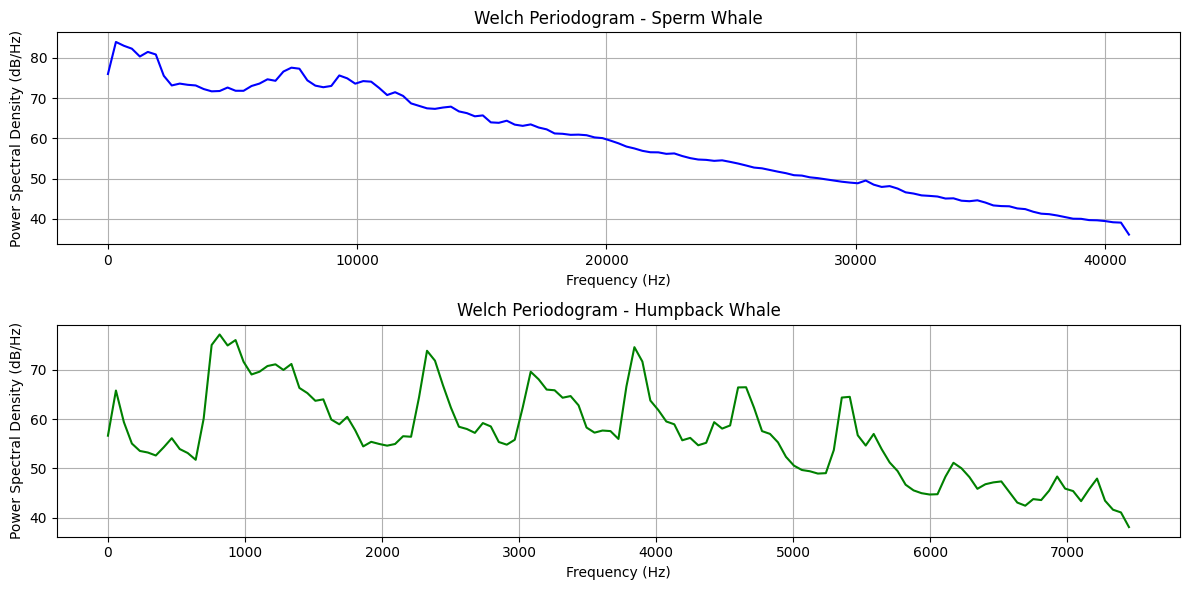

In [144]:
## 3.8

from scipy.signal import welch

# Welch periodogram parameters
window = 'hamming'  # Window function

# Calculate Welch periodogram for sperm whale bio-signal
frequencies_sperm, psd_sperm = welch(sperm_whale_pressure, fs=sr_sperm_whale, window=window)

# Calculate Welch periodogram for humpback whale bio-signal
frequencies_humpback, psd_humpback = welch(humpback_whale_pressure, fs=sr_humpback_whale, window=window)

# Convert PSD to dB relative to 1μPa^2/Hz
psd_sperm_db = 10 * np.log10(psd_sperm)
psd_humpback_db = 10 * np.log10(psd_humpback)

# Plot Welch periodogram for both bio-signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frequencies_sperm, psd_sperm_db, color='blue')
plt.title('Welch Periodogram - Sperm Whale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(frequencies_humpback, psd_humpback_db, color='green')
plt.title('Welch Periodogram - Humpback Whale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

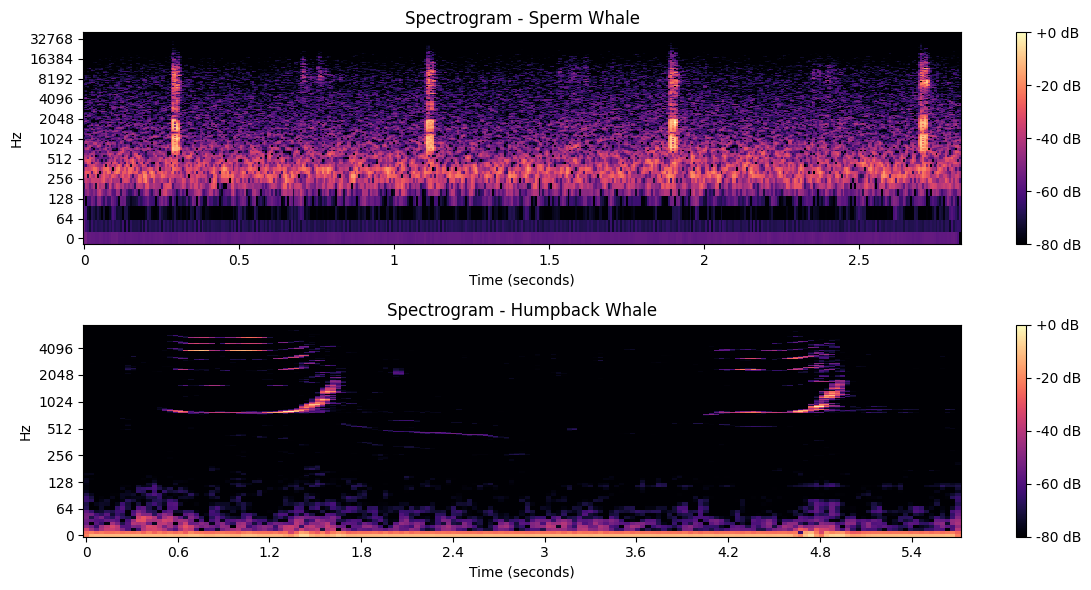

In [145]:
## 3.9

import librosa.display

# Calculate the Short-Time Fourier Transform (STFT) for sperm whale bio-signal
stft_sperm = librosa.stft(sperm_whale_pressure)
stft_sperm_db = librosa.amplitude_to_db(np.abs(stft_sperm)**2, ref=np.max)

# Calculate the Short-Time Fourier Transform (STFT) for humpback whale bio-signal
stft_humpback = librosa.stft(humpback_whale_signal)
stft_humpback_db = librosa.amplitude_to_db(np.abs(stft_humpback)**2, ref=np.max)

# Plot the spectrogram for sperm whale bio-signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(stft_sperm_db, sr=sr_sperm_whale, x_axis='s', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram - Sperm Whale')

# Plot the spectrogram for humpback whale bio-signal
plt.subplot(2, 1, 2)
librosa.display.specshow(stft_humpback_db, sr=sr_humpback_whale, x_axis='s', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram - Humpback Whale')

plt.tight_layout()
plt.show()

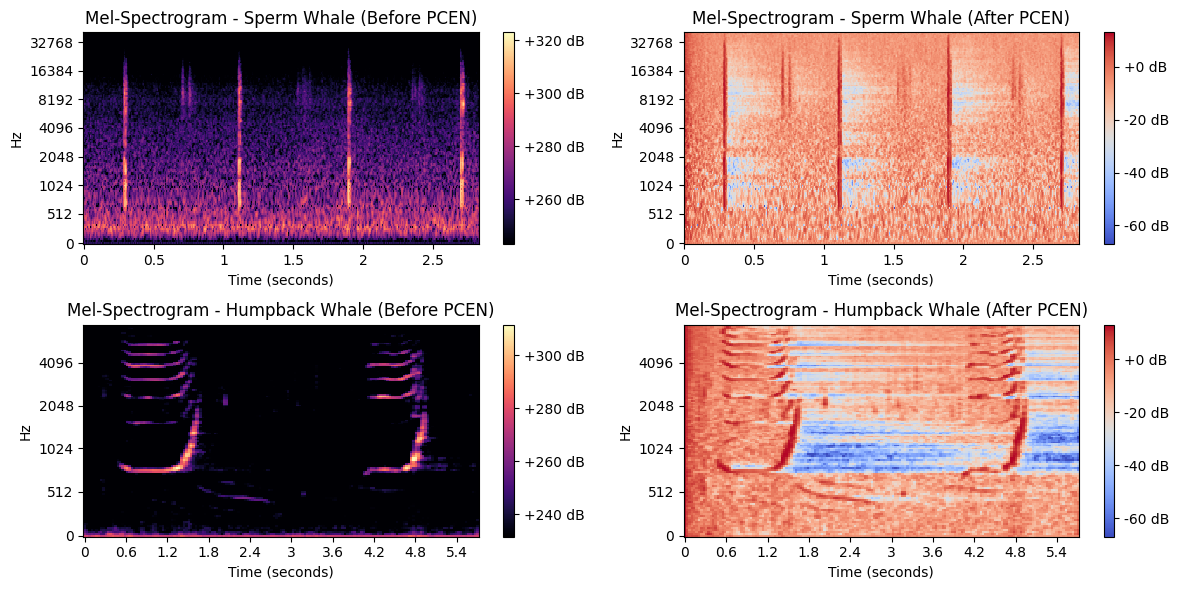

In [146]:
# Compute mel-spectrograms for sperm whale bio-signal
mel_spectrogram_sperm = librosa.feature.melspectrogram(y=sperm_whale_pressure, sr=sr_sperm_whale)
mel_spectrogram_sperm_db = librosa.amplitude_to_db(mel_spectrogram_sperm)

# Apply PCEN to mel-spectrograms for sperm whale bio-signal
mel_spectrogram_pcen_sperm = librosa.pcen(mel_spectrogram_sperm)
mel_spectrogram_pcen_sperm_db = librosa.amplitude_to_db(mel_spectrogram_pcen_sperm)

# Compute mel-spectrograms for humpback whale bio-signal
mel_spectrogram_humpback = librosa.feature.melspectrogram(y=humpback_whale_pressure, sr=sr_humpback_whale)
mel_spectrogram_humpback_db = librosa.amplitude_to_db(mel_spectrogram_humpback)

# Apply PCEN to mel-spectrograms for humpback whale bio-signal
mel_spectrogram_pcen_humpback = librosa.pcen(mel_spectrogram_humpback)
mel_spectrogram_pcen_humpback_db = librosa.amplitude_to_db(mel_spectrogram_pcen_humpback)

# Plot the mel-spectrograms before and after PCEN for sperm whale bio-signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
librosa.display.specshow(mel_spectrogram_sperm_db, sr=sr_sperm_whale, x_axis='s', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram - Sperm Whale (Before PCEN)')

plt.subplot(2, 2, 2)
librosa.display.specshow(mel_spectrogram_pcen_sperm_db, sr=sr_sperm_whale, x_axis='s', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram - Sperm Whale (After PCEN)')

# Plot the mel-spectrograms before and after PCEN for humpback whale bio-signal
plt.subplot(2, 2, 3)
librosa.display.specshow(mel_spectrogram_humpback_db, sr=sr_humpback_whale, x_axis='s', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram - Humpback Whale (Before PCEN)')

plt.subplot(2, 2, 4)
librosa.display.specshow(mel_spectrogram_pcen_humpback_db, sr=sr_humpback_whale, x_axis='s', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram - Humpback Whale (After PCEN)')

plt.tight_layout()
plt.show()